# Importing Libraries

In [1]:
import numpy as np
import keras
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten,Conv2D

# Loading dataset

In [2]:
#loading dataset
x_train = np.loadtxt("C:/Users/tejas/OneDrive/Desktop/for DL/input.csv",delimiter=",")
y_train = np.loadtxt('C:/Users/tejas/OneDrive/Desktop/for DL/labels.csv', delimiter =',')

x_test = np.loadtxt('C:/Users/tejas/OneDrive/Desktop/for DL/input_test.csv', delimiter =',')
y_test = np.loadtxt('C:/Users/tejas/OneDrive/Desktop/for DL/labels_test.csv', delimiter =',')

In [3]:
#Shape
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of x_test :  (400, 30000)
Shape of y_test :  (400,)


In [4]:
#Reshape
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


In [5]:
len(x_train)

2000

# Normalize and display

In [6]:

x_train = x_train/255
x_test = x_test/255

x_train[2,:]

array([[[0.31372549, 0.36078431, 0.34509804],
        [0.3254902 , 0.37647059, 0.34901961],
        [0.29803922, 0.36078431, 0.32156863],
        ...,
        [0.05490196, 0.1372549 , 0.07843137],
        [0.05490196, 0.1372549 , 0.07843137],
        [0.07843137, 0.16078431, 0.10196078]],

       [[0.30588235, 0.34117647, 0.32941176],
        [0.35294118, 0.39607843, 0.37254902],
        [0.30980392, 0.35294118, 0.32156863],
        ...,
        [0.14509804, 0.21176471, 0.14901961],
        [0.12156863, 0.18823529, 0.1254902 ],
        [0.05098039, 0.11764706, 0.05490196]],

       [[0.25098039, 0.25882353, 0.24705882],
        [0.31372549, 0.33333333, 0.30980392],
        [0.36470588, 0.39215686, 0.36078431],
        ...,
        [0.15686275, 0.18039216, 0.1254902 ],
        [0.15686275, 0.18823529, 0.12941176],
        [0.05490196, 0.08627451, 0.02745098]],

       ...,

       [[0.39215686, 0.42745098, 0.36078431],
        [0.36470588, 0.41568627, 0.3372549 ],
        [0.35294118, 0

# Display random image

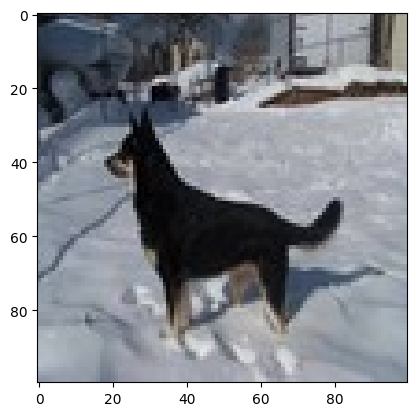

In [7]:

rdx=random.randint(0,len(x_train))
plt.imshow(x_train[rdx,:])
plt.show()

# Model building

In [14]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


In [9]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [10]:
H=model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 10s 288ms/step - loss: 0.7509 - accuracy: 0.5075
Epoch 2/10
32/32 [==============================] - 9s 281ms/step - loss: 0.6814 - accuracy: 0.5930
Epoch 3/10
32/32 [==============================] - 9s 276ms/step - loss: 0.6477 - accuracy: 0.6180
Epoch 4/10
32/32 [==============================] - 9s 285ms/step - loss: 0.6082 - accuracy: 0.6700
Epoch 5/10
32/32 [==============================] - 9s 294ms/step - loss: 0.5540 - accuracy: 0.7270
Epoch 6/10
32/32 [==============================] - 10s 319ms/step - loss: 0.5141 - accuracy: 0.7375
Epoch 7/10
32/32 [==============================] - 10s 326ms/step - loss: 0.4542 - accuracy: 0.7950
Epoch 8/10
32/32 [==============================] - 9s 295ms/step - loss: 0.4016 - accuracy: 0.8210
Epoch 9/10
32/32 [==============================] - 9s 292ms/step - loss: 0.3646 - accuracy: 0.8465
Epoch 10/10
32/32 [==============================] - 9s 296ms/step - loss: 0.2980 - accuracy: 0.8

# Evaluation

In [11]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 33ms/step - loss: 0.7277 - accuracy: 0.6725


[0.7277243733406067, 0.6725000143051147]

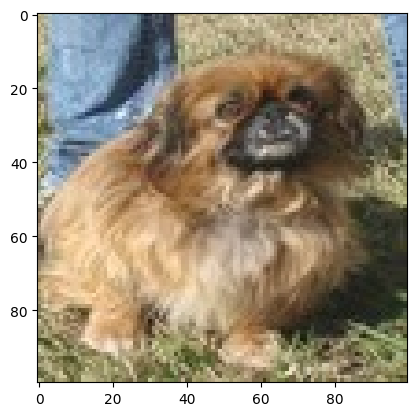

1/1 [==============================] - 0s 153ms/step
It is a dog


In [12]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("It is a",pred)

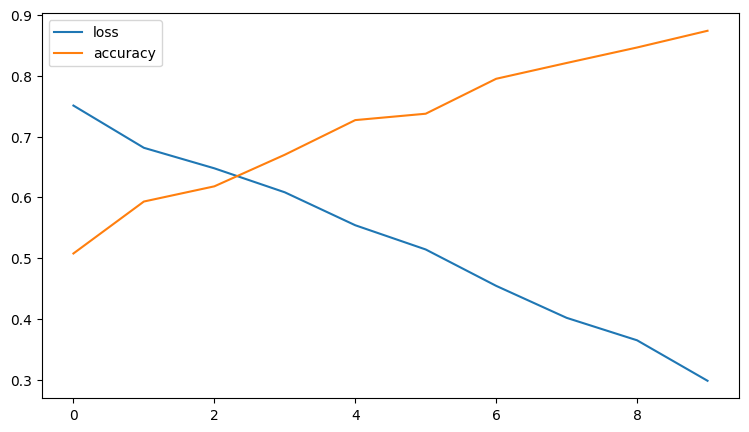

In [13]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()